 # Project: NTSB Aviation Accident Data Analysis

# 1.0 Importing Pandas,numpy,matplotlib and sns

In [2]:
#importing pandas to read csv file from kaggle data and numpy for statistical purposes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Loading the AviationData.csv into Pandas Dataframe

In [3]:
# Reading `AviationData.csv` into a pandas DataFrame named `df`
df = pd.read_csv('AviationData.csv', encoding='ISO -8859-1', low_memory=False)
#checking the first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 1.2 Exploratory Data Analysis

In [4]:
#checking the columns in the aviation dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# changing event date to date time and setting my years of analysis between 1980 and 2022
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df = df[df['Event.Date'].dt.year.between(1980, 2022)]

In [6]:
#Getting an overview of the data to get information on which columns to drop by checking the Non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88883 entries, 6 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88883 non-null  object        
 1   Investigation.Type      88883 non-null  object        
 2   Accident.Number         88883 non-null  object        
 3   Event.Date              88883 non-null  datetime64[ns]
 4   Location                88831 non-null  object        
 5   Country                 88657 non-null  object        
 6   Latitude                34380 non-null  object        
 7   Longitude               34371 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87883 non-null  object        
 11  Aircraft.damage         85689 non-null  object        
 12  Aircraft.Category       32286 non-null  object     

## 1.2.0 selecting the columns relevant to the analysis of my business problem

In [7]:
# keeping the relevant columns for risk analysis and checking the length of the list
columns_to_keep = ['Country','Event.Date','Weather.Condition','Broad.phase.of.flight','Injury.Severity', 'Aircraft.Category','Aircraft.damage','Make', 'Model','Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       ]
len(columns_to_keep)

15

In [8]:
# creating a dataset of to use in the analysis
df1= df[columns_to_keep]
df1.head() #checking the first five rows

,Country,Event.Date,Weather.Condition,Broad.phase.of.flight,Injury.Severity,Aircraft.Category,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
6,United States,1981-08-01,IMC,Unknown,Fatal(4),NaN,Destroyed,Cessna,180,1.0,Reciprocating,4.0,0.0,0.0,0.0
7,United States,1982-01-01,VMC,Takeoff,Non-Fatal,Airplane,Substantial,Cessna,140,1.0,Reciprocating,0.0,0.0,0.0,2.0
8,United States,1982-01-01,IMC,Landing,Non-Fatal,Airplane,Substantial,Cessna,401B,2.0,Reciprocating,0.0,0.0,0.0,2.0
9,United States,1982-01-01,IMC,Cruise,Non-Fatal,NaN,Substantial,North American,NAVION L-17B,1.0,Reciprocating,0.0,0.0,3.0,0.0
10,United States,1982-01-01,VMC,Approach,Non-Fatal,NaN,Substantial,Piper,PA-28-161,1.0,Reciprocating,0.0,0.0,0.0,1.0


In [9]:
(df1.isna().sum()/len(df1))*100

Country                    0.254267
Event.Date                 0.000000
Weather.Condition          5.053835
Broad.phase.of.flight     30.562650
Injury.Severity            1.125075
Aircraft.Category         63.675844
Aircraft.damage            3.593488
Make                       0.070880
Model                      0.103507
Number.of.Engines          6.843828
Engine.Type                7.982404
Total.Fatal.Injuries      12.825850
Total.Serious.Injuries    14.072432
Total.Minor.Injuries      13.423264
Total.Uninjured            6.650316
dtype: float64

# 1.2.1 Filling the null values

In [10]:
# Dropping null values in critical columns
critical_columns = ['Event.Date','Weather.Condition','Total.Fatal.Injuries']
df = df.dropna(subset = critical_columns)

In [11]:
# Filling null values with 0 in numerical columns that dont need guessing
Injury_columns =['Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
df[Injury_columns] = df[Injury_columns].fillna(0)

In [13]:
# filling categorical and null values with 0
for col in df1.columns:
    if df1[col].isnull().sum() > 0:  # Check if there are missing values
        if df1[col].dtype == 'object':  # Categorical columns
            df1[col] = df1[col].fillna('unknown')
        else:  # Numerical columns
            df1[col] = df1[col].fillna(0)

In [ ]:
# checking for null value in the new dataset
df1.isnull().sum()

Country                   0
Event.Date                0
Weather.Condition         0
Broad.phase.of.flight     0
Injury.Severity           0
Aircraft.Category         0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [18]:
#Standardizing the weather condition
df1['Weather.Condition'] = df1['Weather.Condition'].str.upper()


In [ ]:
# assign accident to 1 for purposes of count
df1['Accident.Number'] = 1

### 1.2.2 Dropping Duplicates

In [20]:
df1.duplicated()

6        False
7        False
8        False
9        False
10       False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88883, dtype: bool

In [21]:
df = df.drop_duplicates()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88883 entries, 6 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 88883 non-null  object        
 1   Event.Date              88883 non-null  datetime64[ns]
 2   Weather.Condition       88883 non-null  object        
 3   Broad.phase.of.flight   88883 non-null  object        
 4   Injury.Severity         88883 non-null  object        
 5   Aircraft.Category       88883 non-null  object        
 6   Aircraft.damage         88883 non-null  object        
 7   Make                    88883 non-null  object        
 8   Model                   88883 non-null  object        
 9   Number.of.Engines       88883 non-null  float64       
 10  Engine.Type             88883 non-null  object        
 11  Total.Fatal.Injuries    88883 non-null  float64       
 12  Total.Serious.Injuries  88883 non-null  float64    

### 1.2.3 saving the new cleaned dataset

In [23]:
df1.to_csv('cleaned_aviation_data.csv', index=False, encoding='utf-8-sig')

# 1.3 Data Visualization

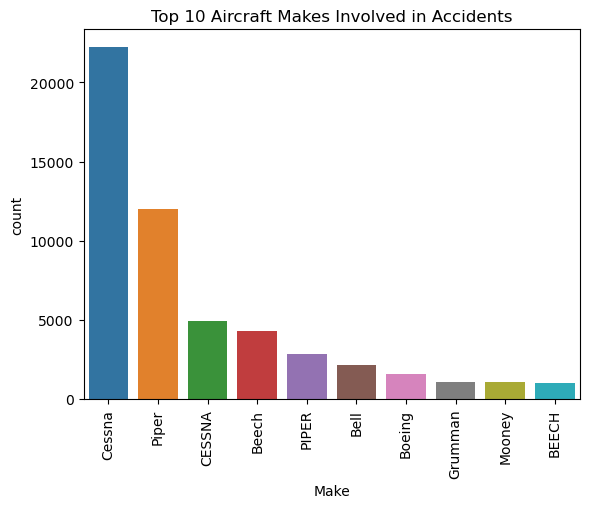

In [24]:
sns.countplot(data=df1, x='Make', order=df['Make'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Aircraft Makes Involved in Accidents')
plt.show()

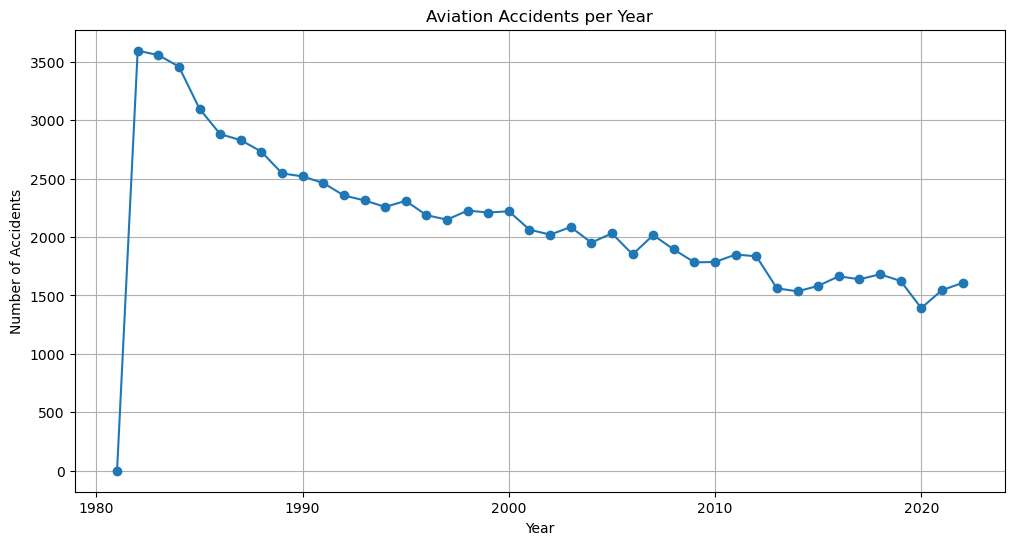

In [25]:
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'], errors='coerce')
df1['Year'] = df1['Event.Date'].dt.year
value_counts= df1['Year'].value_counts
accidents_per_year = df1['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

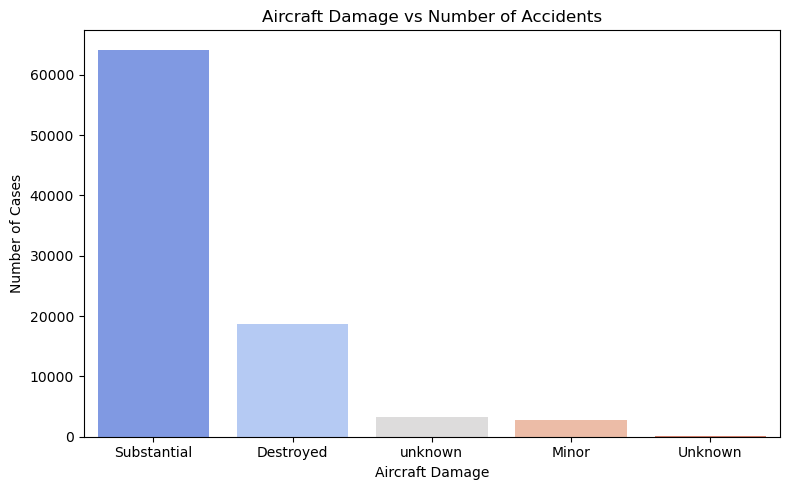

In [26]:
#Aircraft Damage vs Number of Accidents
plt.figure(figsize=(8, 5))
sns.countplot(df1, x='Aircraft.damage', order=df1['Aircraft.damage'].value_counts().index, palette="coolwarm")
plt.title('Aircraft Damage vs Number of Accidents')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

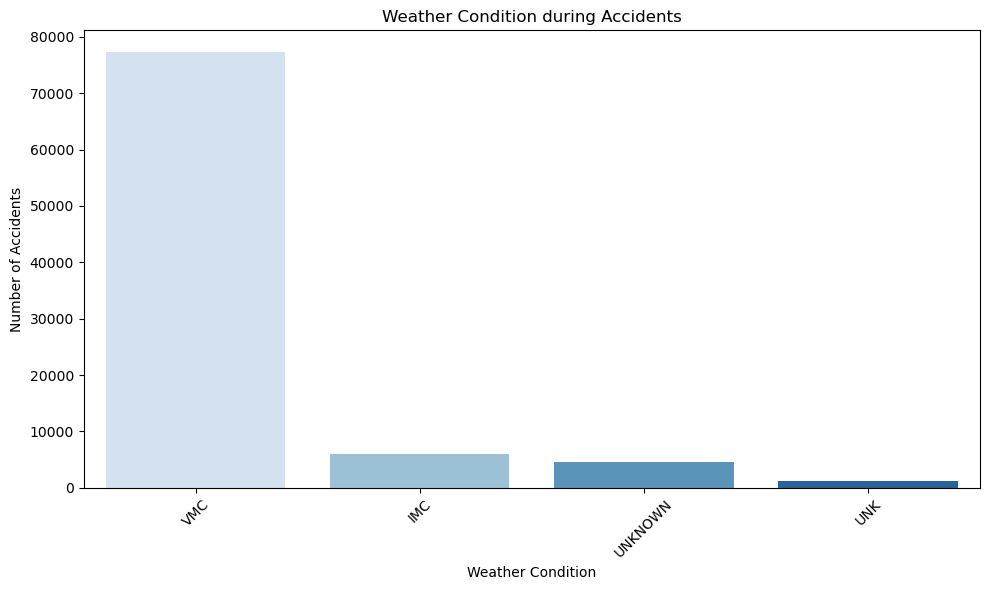

In [27]:
# Weather Condition Impact
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Weather.Condition', order=df1['Weather.Condition'].value_counts().index, palette="Blues")
plt.title('Weather Condition during Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()